In [73]:
# Wine Review datasets is available through kaggle
# https://www.kaggle.com/zynicide/wine-reviews

# Getting all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Reading dataset from local folder

wine = pd.read_csv('winemag-data-130k-v2.csv')

In [68]:
# Looking at the dataset
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [69]:
# Removing not needed column
wine.drop(['Unnamed: 0'],axis=1, inplace=True)

In [71]:
# Getting properties of all the columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [80]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [76]:
sns.set(style='darkgrid')

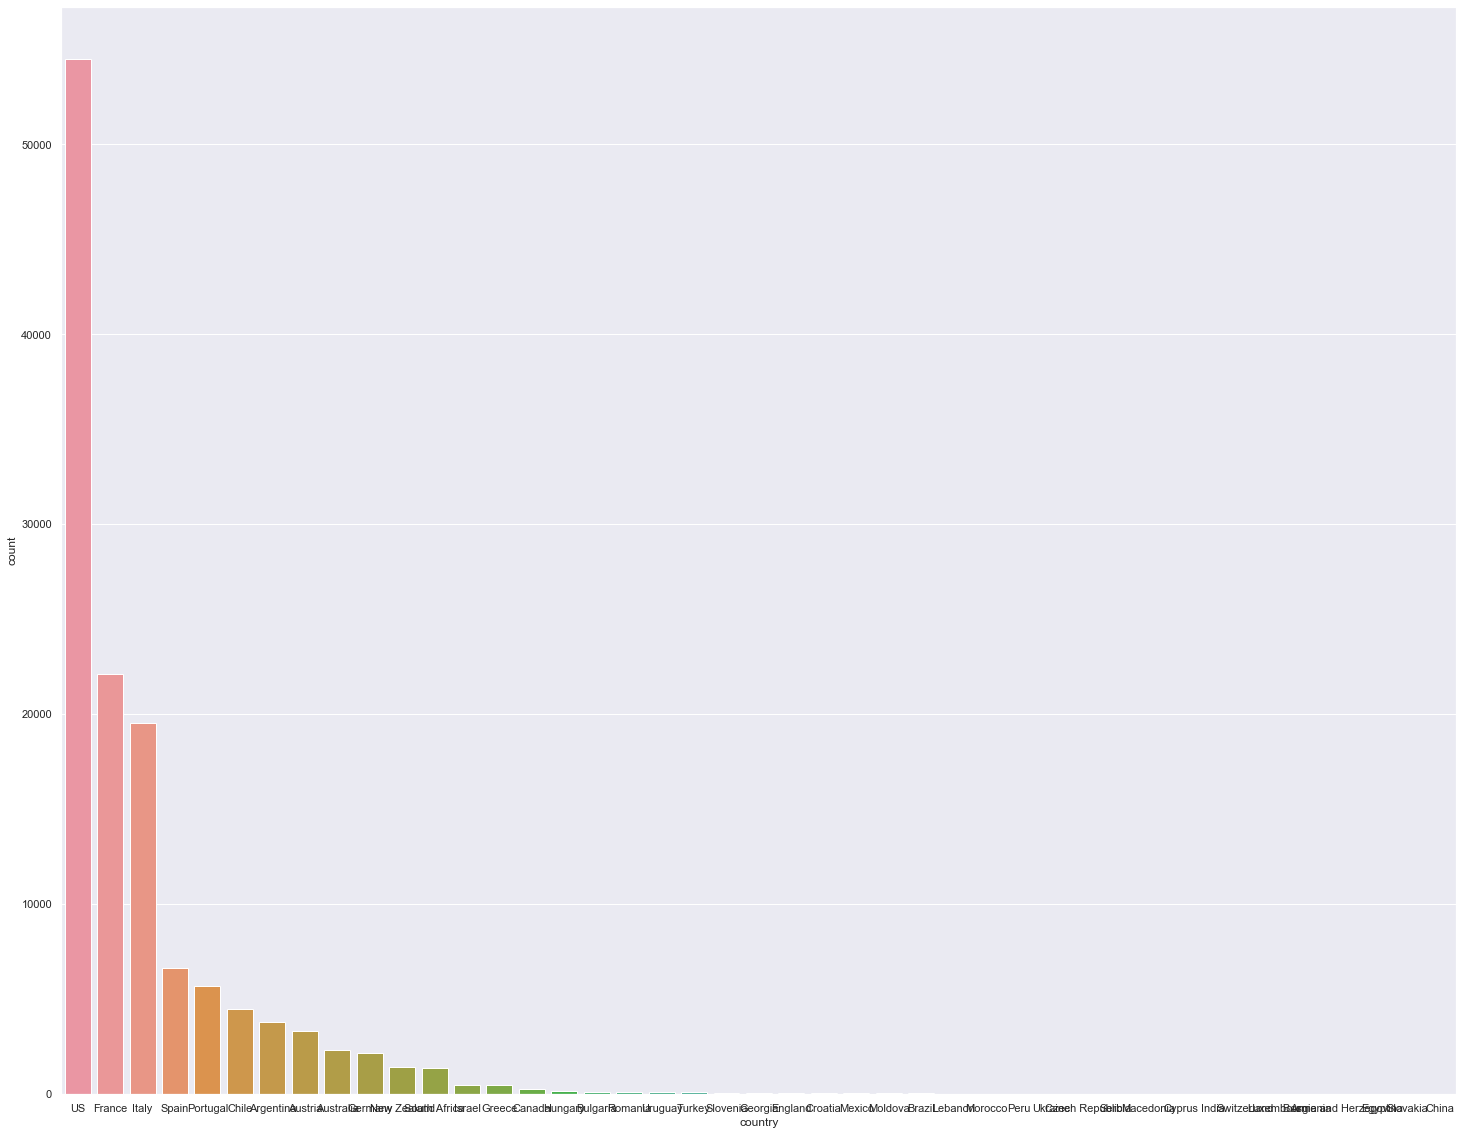

In [82]:
plt.figure(figsize=(25,20))
sns.countplot(x="country", data=wine, order = wine['country'].value_counts().index)
plt.show()

In [84]:
# Getting only desired variable

wine = wine[['taster_name','variety']]

In [85]:
wine.head()

,taster_name,variety
0,Kerin O’Keefe,White Blend
1,Roger Voss,Portuguese Red
2,Paul Gregutt,Pinot Gris
3,Alexander Peartree,Riesling
4,Paul Gregutt,Pinot Noir


In [98]:
# pivot table to get wine flavor as columns
new_wine = pd.pivot_table(data=wine,index=['taster_name'],columns='variety',
                          aggfunc=np.count_nonzero).reset_index().fillna(0)

In [103]:
new_wine.columns

Index(['taster_name', 'Abouriou', 'Agiorgitiko', 'Aglianico', 'Aidani',
       'Airen', 'Albana', 'Albanello', 'Albariño', 'Aleatico',
       ...
       'Yapincak', 'Zelen', 'Zibibbo', 'Zierfandler', 'Zierfandler-Rotgipfler',
       'Zinfandel', 'Zlahtina', 'Zweigelt', 'Çalkarası', 'Žilavka'],
      dtype='object', name='variety', length=671)

In [109]:
# removing every column where values are just zeros
new_wine = new_wine.loc[:, new_wine.any()]

In [114]:
new_wine.head()

variety,taster_name,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,...,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
0,Alexander Peartree,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Anna Lee C. Iijima,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,Anne Krebiehl MW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,10.0,0.0,0.0,260.0,0.0,0.0
3,Carrie Dykes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Christina Pickard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# getting only two columns
# mostly where at least one row has non zero
new_wine_1 = new_wine[['taster_name','Zweigelt','Zierfandler']]

In [120]:
new_wine_1

variety,taster_name,Zweigelt,Zierfandler
0,Alexander Peartree,0.0,0.0
1,Anna Lee C. Iijima,4.0,0.0
2,Anne Krebiehl MW,260.0,24.0
3,Carrie Dykes,0.0,0.0
4,Christina Pickard,0.0,0.0
5,Fiona Adams,0.0,0.0
6,Jeff Jenssen,2.0,0.0
7,Jim Gordon,0.0,0.0
8,Joe Czerwinski,0.0,0.0
9,Kerin O’Keefe,0.0,0.0
